In [2]:
# Frequency references for ZPAC
# Lo Frequency Parameters
min_lo = 3
max_lo = 15
num_lo = 6
frex_lo = np.linspace(min_lo, max_lo, num_lo)
print(frex_lo)
# Hi Frequency Parameters
min_hi = 22
max_hi = 42
num_hi = 5
frex_hi = np.linspace(min_hi, max_hi, num_hi)
print(frex_hi)

[ 3.   5.4  7.8 10.2 12.6 15. ]
[22. 27. 32. 37. 42.]


In [3]:
import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels

NDR = pd.read_excel('Raw_NDR.xlsx', 'Sheet2')

NDR_G3_Bsl = NDR['C_Bsl']
NDR_G3_Bsl = NDR_G3_Bsl.drop(index=4, inplace=False)
NDR_G4_Bsl = NDR['D_Bsl']
# NDR_G4_Bsl = NDR_G4_Bsl.drop(index=2, inplace=False)
NDR_G5_Bsl = NDR['E_Bsl']

NDR_G3_ACS = NDR['C_tACS']
NDR_G3_ACS = NDR_G3_ACS.drop(index=4, inplace=False)
NDR_G4_ACS = NDR['D_tACS']
# NDR_G4_ACS = NDR_G4_ACS.drop(index=2, inplace=False)
NDR_G5_ACS = NDR['E_tACS']

NDR_G3_P10 = NDR['C_P10']
NDR_G3_P10 = NDR_G3_P10.drop(index=4, inplace=False)
NDR_G4_P10 = NDR['D_P10']
# NDR_G4_P10 = NDR_G4_P10.drop(index=2, inplace=False)
NDR_G5_P10 = NDR['E_P10']

NDR_G3_P30 = NDR['C_P30']
NDR_G3_P30 = NDR_G3_P30.drop(index=4, inplace=False)
NDR_G4_P30 = NDR['D_P30']
# NDR_G4_P30 = NDR_G4_P30.drop(index=2, inplace=False)
NDR_G5_P30 = NDR['E_P30']

zPAC_G3_Bsl = np.empty([15,5,6,2])
zPAC_G3_P10 = np.empty([15,5,6,2])
zPAC_G3_P30 = np.empty([15,5,6,2])
zPAC_G4_Bsl = np.empty([15,5,6,2])
zPAC_G4_P10 = np.empty([15,5,6,2])
zPAC_G4_P30 = np.empty([15,5,6,2])
zPAC_G5_Bsl = np.empty([15,5,6,2])
zPAC_G5_P10 = np.empty([15,5,6,2])
zPAC_G5_P30 = np.empty([15,5,6,2])

for a in range(15):
    ##P10 or P30/home/robertofelipe_sg
    zPAC_G3_Bsl[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/Bsl/zPAC_V1V5_%s_%s.npy' %('G3_Bsl', a+1))
    zPAC_G3_P10[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/P10/zPAC_V1V5_%s_%s.npy' %('G3_P10', a+1))
    zPAC_G3_P30[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/P30/zPAC_V1V5_%s_%s.npy' %('G3_P30', a+1))
    zPAC_G4_Bsl[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/Bsl/zPAC_V1V5_%s_%s.npy' %('G4_Bsl', a+1))
    zPAC_G4_P10[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/P10/zPAC_V1V5_%s_%s.npy' %('G4_P10', a+1))
    zPAC_G4_P30[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/P30/zPAC_V1V5_%s_%s.npy' %('G4_P30', a+1))
    zPAC_G5_Bsl[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/Bsl/zPAC_V1V5_%s_%s.npy' %('G5_Bsl', a+1))
    zPAC_G5_P10[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/P10/zPAC_V1V5_%s_%s.npy' %('G5_P10', a+1))
    zPAC_G5_P30[a,:,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/CrossFr_Src/Data/zPAC/P30/zPAC_V1V5_%s_%s.npy' %('G5_P30', a+1))
    
print(zPAC_G3_Bsl.shape) # Subjects x HiFr x LoFr x 2 Direction of Interaction

zPAC_G3_Bsl_avg_0 = np.mean(zPAC_G3_Bsl[:,2:4,2:4,0], axis=(1,2))
zPAC_G3_Bsl_avg_0 = np.delete(zPAC_G3_Bsl_avg_0, 4)
zPAC_G3_P10_avg_0 = np.mean(zPAC_G3_P10[:,2:4,2:4,0], axis=(1,2))
zPAC_G3_P10_avg_0 = np.delete(zPAC_G3_P10_avg_0, 4)
zPAC_G3_P30_avg_0 = np.mean(zPAC_G3_P30[:,2:4,2:4,0], axis=(1,2))
zPAC_G3_P30_avg_0 = np.delete(zPAC_G3_P30_avg_0, 4)
zPAC_G4_Bsl_avg_0 = np.mean(zPAC_G4_Bsl[:,2:4,2:4,0], axis=(1,2))
zPAC_G4_P10_avg_0 = np.mean(zPAC_G4_P10[:,2:4,2:4,0], axis=(1,2))
zPAC_G4_P30_avg_0 = np.mean(zPAC_G4_P30[:,2:4,2:4,0], axis=(1,2))
zPAC_G5_Bsl_avg_0 = np.mean(zPAC_G5_Bsl[:,2:4,2:4,0], axis=(1,2))
zPAC_G5_P10_avg_0 = np.mean(zPAC_G5_P10[:,2:4,2:4,0], axis=(1,2))
zPAC_G5_P30_avg_0 = np.mean(zPAC_G5_P30[:,2:4,2:4,0], axis=(1,2))


zPAC_G3_Bsl_avg_1 = np.mean(zPAC_G3_Bsl[:,2:4,2:4,1], axis=(1,2))
zPAC_G3_Bsl_avg_1 = np.delete(zPAC_G3_Bsl_avg_1, 4)
zPAC_G3_P10_avg_1 = np.mean(zPAC_G3_P10[:,2:4,2:4,1], axis=(1,2))
zPAC_G3_P10_avg_1 = np.delete(zPAC_G3_P10_avg_1, 4)
zPAC_G3_P30_avg_1 = np.mean(zPAC_G3_P30[:,2:4,2:4,1], axis=(1,2))
zPAC_G3_P30_avg_1 = np.delete(zPAC_G3_P30_avg_1, 4)
zPAC_G4_Bsl_avg_1 = np.mean(zPAC_G4_Bsl[:,2:4,2:4,1], axis=(1,2))
zPAC_G4_P10_avg_1 = np.mean(zPAC_G4_P10[:,2:4,2:4,1], axis=(1,2))
zPAC_G4_P30_avg_1 = np.mean(zPAC_G4_P30[:,2:4,2:4,1], axis=(1,2))
zPAC_G5_Bsl_avg_1 = np.mean(zPAC_G5_Bsl[:,2:4,2:4,1], axis=(1,2))
zPAC_G5_P10_avg_1 = np.mean(zPAC_G5_P10[:,2:4,2:4,1], axis=(1,2))
zPAC_G5_P30_avg_1 = np.mean(zPAC_G5_P30[:,2:4,2:4,1], axis=(1,2))

Coh_G3_Bsl = np.empty([2,2,15,40,750])
Coh_G3_P10 = np.empty([2,2,15,40,750])
Coh_G3_P30 = np.empty([2,2,15,40,750])
Coh_G4_Bsl = np.empty([2,2,15,40,750])
Coh_G4_P10 = np.empty([2,2,15,40,750])
Coh_G4_P30 = np.empty([2,2,15,40,750])
Coh_G5_Bsl = np.empty([2,2,15,40,750])
Coh_G5_P10 = np.empty([2,2,15,40,750])
Coh_G5_P30 = np.empty([2,2,15,40,750])

for a in range(15):
    #Bsl/home/robertofelipe_sg/Documents/1st_2nd_Results/Sources/Coh_Src/Data
    Coh_G3_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P10_Bsl/Coh_%s_%s.npy' %('G3_Bsl', a+1))
    Coh_G4_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P10_Bsl/Coh_%s_%s.npy' %('G4_Bsl', a+1))
    Coh_G5_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P10_Bsl/Coh_%s_%s.npy' %('G5_Bsl', a+1))    
    #P10
    Coh_G3_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P10_Bsl/Coh_%s_%s.npy' %('G3_P10', a+1))
    Coh_G4_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P10_Bsl/Coh_%s_%s.npy' %('G4_P10', a+1))
    Coh_G5_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P10_Bsl/Coh_%s_%s.npy' %('G5_P10', a+1))
    #P30
    Coh_G3_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P30_Bsl/Coh_%s_%s.npy' %('G3_P30', a+1))
    Coh_G4_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P30_Bsl/Coh_%s_%s.npy' %('G4_P30', a+1))
    Coh_G5_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Coh_Src/Data/P30_Bsl/Coh_%s_%s.npy' %('G5_P30', a+1))
    #print(G4_Bsl[1,0,5,:,:])

# Alpha Coh
Coh_G3_Bsl_Alp = np.mean(Coh_G3_Bsl[1,0,:,5:11,350:550], axis=(1,2))
Coh_G3_Bsl_Alp = np.delete(Coh_G3_Bsl_Alp, 4)
Coh_G4_Bsl_Alp = np.mean(Coh_G4_Bsl[1,0,:,5:11,350:550], axis=(1,2))
Coh_G5_Bsl_Alp = np.mean(Coh_G5_Bsl[1,0,:,5:11,350:550], axis=(1,2))
Coh_G3_P10_Alp = np.mean(Coh_G3_P10[1,0,:,5:11,350:550], axis=(1,2))
Coh_G3_P10_Alp = np.delete(Coh_G3_P10_Alp, 4)
Coh_G4_P10_Alp = np.mean(Coh_G4_P10[1,0,:,5:11,350:550], axis=(1,2))
Coh_G5_P10_Alp = np.mean(Coh_G5_P10[1,0,:,5:11,350:550], axis=(1,2))
Coh_G3_P30_Alp = np.mean(Coh_G3_P30[1,0,:,5:11,350:550], axis=(1,2))
Coh_G3_P30_Alp = np.delete(Coh_G3_P30_Alp, 4)
Coh_G4_P30_Alp = np.mean(Coh_G4_P30[1,0,:,5:11,350:550], axis=(1,2))
Coh_G5_P30_Alp = np.mean(Coh_G5_P30[1,0,:,5:11,350:550], axis=(1,2))
# Beta Coh
Coh_G3_Bsl_Bet = np.mean(Coh_G3_Bsl[1,0,:,12:28,350:550], axis=(1,2))
Coh_G3_Bsl_Bet = np.delete(Coh_G3_Bsl_Bet, 4)
Coh_G4_Bsl_Bet = np.mean(Coh_G4_Bsl[1,0,:,12:28,350:550], axis=(1,2))
Coh_G5_Bsl_Bet = np.mean(Coh_G5_Bsl[1,0,:,12:28,350:550], axis=(1,2))
Coh_G3_P10_Bet = np.mean(Coh_G3_P10[1,0,:,12:28,350:550], axis=(1,2))
Coh_G3_P10_Bet = np.delete(Coh_G3_P10_Bet, 4)
Coh_G4_P10_Bet = np.mean(Coh_G4_P10[1,0,:,12:28,350:550], axis=(1,2))
Coh_G5_P10_Bet = np.mean(Coh_G5_P10[1,0,:,12:28,350:550], axis=(1,2))
Coh_G3_P30_Bet = np.mean(Coh_G3_P30[1,0,:,12:28,350:550], axis=(1,2))
Coh_G3_P30_Bet = np.delete(Coh_G3_P30_Bet, 4)
Coh_G4_P30_Bet = np.mean(Coh_G4_P30[1,0,:,12:28,350:550], axis=(1,2))
Coh_G5_P30_Bet = np.mean(Coh_G5_P30[1,0,:,12:28,350:550], axis=(1,2))
# Gamma Coh
Coh_G3_Bsl_Gam = np.mean(Coh_G3_Bsl[1,0,:,29:40,350:550], axis=(1,2))
Coh_G3_Bsl_Gam = np.delete(Coh_G3_Bsl_Gam, 4)
Coh_G4_Bsl_Gam = np.mean(Coh_G4_Bsl[1,0,:,29:40,350:550], axis=(1,2))
Coh_G5_Bsl_Gam = np.mean(Coh_G5_Bsl[1,0,:,29:40,350:550], axis=(1,2))
Coh_G3_P10_Gam = np.mean(Coh_G3_P10[1,0,:,29:40,350:550], axis=(1,2))
Coh_G3_P10_Gam = np.delete(Coh_G3_P10_Gam, 4)
Coh_G4_P10_Gam = np.mean(Coh_G4_P10[1,0,:,29:40,350:550], axis=(1,2))
Coh_G5_P10_Gam = np.mean(Coh_G5_P10[1,0,:,29:40,350:550], axis=(1,2))
Coh_G3_P30_Gam = np.mean(Coh_G3_P30[1,0,:,29:40,350:550], axis=(1,2))
Coh_G3_P30_Gam = np.delete(Coh_G3_P30_Gam, 4)
Coh_G4_P30_Gam = np.mean(Coh_G4_P30[1,0,:,29:40,350:550], axis=(1,2))
Coh_G5_P30_Gam = np.mean(Coh_G5_P30[1,0,:,29:40,350:550], axis=(1,2))
#print(G3_P10_Gam)

Wpli_G3_Bsl = np.empty([2,2,15,40,750])
Wpli_G3_P10 = np.empty([2,2,15,40,750])
Wpli_G3_P30 = np.empty([2,2,15,40,750])
Wpli_G4_Bsl = np.empty([2,2,15,40,750])
Wpli_G4_P10 = np.empty([2,2,15,40,750])
Wpli_G4_P30 = np.empty([2,2,15,40,750])
Wpli_G5_Bsl = np.empty([2,2,15,40,750])
Wpli_G5_P10 = np.empty([2,2,15,40,750])
Wpli_G5_P30 = np.empty([2,2,15,40,750])
# Wpli_All_Alp = np.empty([132,1])
# Wpli_All_Gam = np.empty([132,1])

for a in range(15):
    #Bsl
    Wpli_G3_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G3_Bsl', a+1))
    Wpli_G4_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G4_Bsl', a+1))
    Wpli_G5_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G5_Bsl', a+1))    
    #P10
    Wpli_G3_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G3_P10', a+1))
    Wpli_G4_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G4_P10', a+1))
    Wpli_G5_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G5_P10', a+1))
    #P30
    Wpli_G3_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G3_P30', a+1))
    Wpli_G4_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G4_P30', a+1))
    Wpli_G5_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Wpli_Src/Wpli_%s_%s.npy' %('G5_P30', a+1))
    #print(G4_Bsl[1,0,5,:,:])

# Alpha Wpli
Wpli_G3_Bsl_Alp = np.mean(Wpli_G3_Bsl[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G3_Bsl_Alp = np.delete(Wpli_G3_Bsl_Alp, 4)
Wpli_G4_Bsl_Alp = np.mean(Wpli_G4_Bsl[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G5_Bsl_Alp = np.mean(Wpli_G5_Bsl[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G3_P10_Alp = np.mean(Wpli_G3_P10[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G3_P10_Alp = np.delete(Wpli_G3_P10_Alp, 4)
Wpli_G4_P10_Alp = np.mean(Wpli_G4_P10[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G5_P10_Alp = np.mean(Wpli_G5_P10[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G3_P30_Alp = np.mean(Wpli_G3_P30[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G3_P30_Alp = np.delete(Wpli_G3_P30_Alp, 4)
Wpli_G4_P30_Alp = np.mean(Wpli_G4_P30[1,0,:,5:11,350:550], axis=(1,2))
Wpli_G5_P30_Alp = np.mean(Wpli_G5_P30[1,0,:,5:11,350:550], axis=(1,2))
# Beta Wpli
Wpli_G3_Bsl_Bet = np.mean(Wpli_G3_Bsl[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G3_Bsl_Bet = np.delete(Wpli_G3_Bsl_Bet, 4)
Wpli_G4_Bsl_Bet = np.mean(Wpli_G4_Bsl[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G5_Bsl_Bet = np.mean(Wpli_G5_Bsl[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G3_P10_Bet = np.mean(Wpli_G3_P10[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G3_P10_Bet = np.delete(Wpli_G3_P10_Bet, 4)
Wpli_G4_P10_Bet = np.mean(Wpli_G4_P10[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G5_P10_Bet = np.mean(Wpli_G5_P10[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G3_P30_Bet = np.mean(Wpli_G3_P30[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G3_P30_Bet = np.delete(Wpli_G3_P30_Bet, 4)
Wpli_G4_P30_Bet = np.mean(Wpli_G4_P30[1,0,:,12:28,350:550], axis=(1,2))
Wpli_G5_P30_Bet = np.mean(Wpli_G5_P30[1,0,:,12:28,350:550], axis=(1,2))
# Gamma Wpli
Wpli_G3_Bsl_Gam = np.mean(Wpli_G3_Bsl[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G3_Bsl_Gam = np.delete(Wpli_G3_Bsl_Gam, 4)
Wpli_G4_Bsl_Gam = np.mean(Wpli_G4_Bsl[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G5_Bsl_Gam = np.mean(Wpli_G5_Bsl[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G3_P10_Gam = np.mean(Wpli_G3_P10[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G3_P10_Gam = np.delete(Wpli_G3_P10_Gam, 4)
Wpli_G4_P10_Gam = np.mean(Wpli_G4_P10[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G5_P10_Gam = np.mean(Wpli_G5_P10[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G3_P30_Gam = np.mean(Wpli_G3_P30[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G3_P30_Gam = np.delete(Wpli_G3_P30_Gam, 4)
Wpli_G4_P30_Gam = np.mean(Wpli_G4_P30[1,0,:,29:40,350:550], axis=(1,2))
Wpli_G5_P30_Gam = np.mean(Wpli_G5_P30[1,0,:,29:40,350:550], axis=(1,2))


# Alpha PSD
Psd_G3_Bsl_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G3_P1-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G3_Bsl_Alp = np.delete(Psd_G3_Bsl_Alp, 4)
Psd_G3_P10_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G3_P1-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G3_P10_Alp = np.delete(Psd_G3_P10_Alp, 4)
Psd_G3_P30_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G3_P3-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G3_P30_Alp = np.delete(Psd_G3_P30_Alp, 4)
Psd_G4_Bsl_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G4_P1-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G4_P10_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G4_P1-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G4_P30_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G4_P3-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G5_Bsl_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G5_P1-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G5_P10_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G5_P1-Bsl.npy')[:,7:13],axis=(1,2))
Psd_G5_P30_Alp = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G5_P3-Bsl.npy')[:,7:13],axis=(1,2))
# Beta PSD
Psd_G3_Bsl_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G3_P1-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G3_Bsl_Bet = np.delete(Psd_G3_Bsl_Bet, 4)
Psd_G3_P10_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G3_P1-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G3_P10_Bet = np.delete(Psd_G3_P10_Bet, 4)
Psd_G3_P30_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G3_P3-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G3_P30_Bet = np.delete(Psd_G3_P30_Bet, 4)
Psd_G4_Bsl_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G4_P1-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G4_P10_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G4_P1-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G4_P30_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G4_P3-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G5_Bsl_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G5_P1-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G5_P10_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G5_P1-Bsl.npy')[:,14:29],axis=(1,2))
Psd_G5_P30_Bet = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G5_P3-Bsl.npy')[:,14:29],axis=(1,2))
# Gamma PSD
Psd_G3_Bsl_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G3_P1-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G3_Bsl_Gam = np.delete(Psd_G3_Bsl_Gam, 4)
Psd_G3_P10_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G3_P1-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G3_P10_Gam = np.delete(Psd_G3_P10_Gam, 4)
Psd_G3_P30_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G3_P3-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G3_P30_Gam = np.delete(Psd_G3_P30_Gam, 4)
Psd_G4_Bsl_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G4_P1-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G4_P10_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G4_P1-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G4_P30_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G4_P3-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G5_Bsl_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pre_PSD_All_G5_P1-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G5_P10_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G5_P1-Bsl.npy')[:,30:45],axis=(1,2))
Psd_G5_P30_Gam = np.mean(np.load('../../../Documents/1st_2nd_Results/Electrodes/Psd_FullBrain/Pos_PSD_All_G5_P3-Bsl.npy')[:,30:45],axis=(1,2))

Psi_G3_Bsl = np.empty([2,2,15,4,750])
Psi_G3_P10 = np.empty([2,2,15,4,750])
Psi_G3_P30 = np.empty([2,2,15,4,750])
Psi_G4_Bsl = np.empty([2,2,15,4,750])
Psi_G4_P10 = np.empty([2,2,15,4,750])
Psi_G4_P30 = np.empty([2,2,15,4,750])
Psi_G5_Bsl = np.empty([2,2,15,4,750])
Psi_G5_P10 = np.empty([2,2,15,4,750])
Psi_G5_P30 = np.empty([2,2,15,4,750])

for a in range(15):
    #Bsl
    Psi_G3_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G3_Bsl', a+1))
    Psi_G4_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G4_Bsl', a+1))
    Psi_G5_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G5_Bsl', a+1))    
    #P10
    Psi_G3_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G3_P10', a+1))
    Psi_G4_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G4_P10', a+1))
    Psi_G5_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G5_P10', a+1))
    #P30
    Psi_G3_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G3_P30', a+1))
    Psi_G4_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G4_P30', a+1))
    Psi_G5_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/Psi_Src/Psi_%s_%s.npy' %('G5_P30', a+1))
    #print(G4_Bsl[1,0,5,:,:])

# Theta Psi
Psi_G3_Bsl_The = np.mean(Psi_G3_Bsl[1,0,:,0,350:550], axis=1)
Psi_G3_Bsl_The = np.delete(Psi_G3_Bsl_The, 4)
Psi_G4_Bsl_The = np.mean(Psi_G4_Bsl[1,0,:,0,350:550], axis=1)
Psi_G5_Bsl_The = np.mean(Psi_G5_Bsl[1,0,:,0,350:550], axis=1)
Psi_G3_P10_The = np.mean(Psi_G3_P10[1,0,:,0,350:550], axis=1)
Psi_G3_P10_The = np.delete(Psi_G3_P10_The, 4)
Psi_G4_P10_The = np.mean(Psi_G4_P10[1,0,:,0,350:550], axis=1)
Psi_G5_P10_The = np.mean(Psi_G5_P10[1,0,:,0,350:550], axis=1)
Psi_G3_P30_The = np.mean(Psi_G3_P30[1,0,:,0,350:550], axis=1)
Psi_G3_P30_The = np.delete(Psi_G3_P30_The, 4)
Psi_G4_P30_The = np.mean(Psi_G4_P30[1,0,:,0,350:550], axis=1)
Psi_G5_P30_The = np.mean(Psi_G5_P30[1,0,:,0,350:550], axis=1)
# Alpha Psi
Psi_G3_Bsl_Alp = np.mean(Psi_G3_Bsl[1,0,:,1,350:550], axis=1)
Psi_G3_Bsl_Alp = np.delete(Psi_G3_Bsl_Alp, 4)
Psi_G4_Bsl_Alp = np.mean(Psi_G4_Bsl[1,0,:,1,350:550], axis=1)
Psi_G5_Bsl_Alp = np.mean(Psi_G5_Bsl[1,0,:,1,350:550], axis=1)
Psi_G3_P10_Alp = np.mean(Psi_G3_P10[1,0,:,1,350:550], axis=1)
Psi_G3_P10_Alp = np.delete(Psi_G3_P10_Alp, 4)
Psi_G4_P10_Alp = np.mean(Psi_G4_P10[1,0,:,1,350:550], axis=1)
Psi_G5_P10_Alp = np.mean(Psi_G5_P10[1,0,:,1,350:550], axis=1)
Psi_G3_P30_Alp = np.mean(Psi_G3_P30[1,0,:,1,350:550], axis=1)
Psi_G3_P30_Alp = np.delete(Psi_G3_P30_Alp, 4)
Psi_G4_P30_Alp = np.mean(Psi_G4_P30[1,0,:,1,350:550], axis=1)
Psi_G5_P30_Alp = np.mean(Psi_G5_P30[1,0,:,1,350:550], axis=1)
# Beta Psi
Psi_G3_Bsl_Bet = np.mean(Psi_G3_Bsl[1,0,:,2,350:550], axis=1)
Psi_G3_Bsl_Bet = np.delete(Psi_G3_Bsl_Bet, 4)
Psi_G4_Bsl_Bet = np.mean(Psi_G4_Bsl[1,0,:,2,350:550], axis=1)
Psi_G5_Bsl_Bet = np.mean(Psi_G5_Bsl[1,0,:,2,350:550], axis=1)
Psi_G3_P10_Bet = np.mean(Psi_G3_P10[1,0,:,2,350:550], axis=1)
Psi_G3_P10_Bet = np.delete(Psi_G3_P10_Bet, 4)
Psi_G4_P10_Bet = np.mean(Psi_G4_P10[1,0,:,2,350:550], axis=1)
Psi_G5_P10_Bet = np.mean(Psi_G5_P10[1,0,:,2,350:550], axis=1)
Psi_G3_P30_Bet = np.mean(Psi_G3_P30[1,0,:,2,350:550], axis=1)
Psi_G3_P30_Bet = np.delete(Psi_G3_P30_Bet, 4)
Psi_G4_P30_Bet = np.mean(Psi_G4_P30[1,0,:,2,350:550], axis=1)
Psi_G5_P30_Bet = np.mean(Psi_G5_P30[1,0,:,2,350:550], axis=1)
# Gamma Psi
Psi_G3_Bsl_Gam = np.mean(Psi_G3_Bsl[1,0,:,3,350:550], axis=1)
Psi_G3_Bsl_Gam = np.delete(Psi_G3_Bsl_Gam, 4)
Psi_G4_Bsl_Gam = np.mean(Psi_G4_Bsl[1,0,:,3,350:550], axis=1)
Psi_G5_Bsl_Gam = np.mean(Psi_G5_Bsl[1,0,:,3,350:550], axis=1)
Psi_G3_P10_Gam = np.mean(Psi_G3_P10[1,0,:,3,350:550], axis=1)
Psi_G3_P10_Gam = np.delete(Psi_G3_P10_Gam, 4)
Psi_G4_P10_Gam = np.mean(Psi_G4_P10[1,0,:,3,350:550], axis=1)
Psi_G5_P10_Gam = np.mean(Psi_G5_P10[1,0,:,3,350:550], axis=1)
Psi_G3_P30_Gam = np.mean(Psi_G3_P30[1,0,:,3,350:550], axis=1)
Psi_G3_P30_Gam = np.delete(Psi_G3_P30_Gam, 4)
Psi_G4_P30_Gam = np.mean(Psi_G4_P30[1,0,:,3,350:550], axis=1)
Psi_G5_P30_Gam = np.mean(Psi_G5_P30[1,0,:,3,350:550], axis=1)
print(Psi_G4_P10.shape) #Psi_G3_P10[1,0,1,3,350:550])#

ImCoh_G3_Bsl = np.empty([2,2,15,40,750])
ImCoh_G3_P10 = np.empty([2,2,15,40,750])
ImCoh_G3_P30 = np.empty([2,2,15,40,750])
ImCoh_G4_Bsl = np.empty([2,2,15,40,750])
ImCoh_G4_P10 = np.empty([2,2,15,40,750])
ImCoh_G4_P30 = np.empty([2,2,15,40,750])
ImCoh_G5_Bsl = np.empty([2,2,15,40,750])
ImCoh_G5_P10 = np.empty([2,2,15,40,750])
ImCoh_G5_P30 = np.empty([2,2,15,40,750])

for a in range(15):
    #Bsl
    ImCoh_G3_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G3_Bsl', a+1))
    ImCoh_G4_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G4_Bsl', a+1))
    ImCoh_G5_Bsl[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G5_Bsl', a+1))    
    #P10
    ImCoh_G3_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G3_P10', a+1))
    ImCoh_G4_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G4_P10', a+1))
    ImCoh_G5_P10[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G5_P10', a+1))
    #P30
    ImCoh_G3_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G3_P30', a+1))
    ImCoh_G4_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G4_P30', a+1))
    ImCoh_G5_P30[:,:,a,:,:] = np.load('../../../Documents/1st_2nd_Results/Sources/ImCoh_Src/ImCoh_%s_%s.npy' %('G5_P30', a+1))
    #print(G4_Bsl[1,0,5,:,:])

# Alpha ImCoh
ImCoh_G3_Bsl_Alp = np.mean(ImCoh_G3_Bsl[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G3_Bsl_Alp = np.delete(ImCoh_G3_Bsl_Alp, 4)
ImCoh_G4_Bsl_Alp = np.mean(ImCoh_G4_Bsl[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G5_Bsl_Alp = np.mean(ImCoh_G5_Bsl[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G3_P10_Alp = np.mean(ImCoh_G3_P10[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G3_P10_Alp = np.delete(ImCoh_G3_P10_Alp, 4)
ImCoh_G4_P10_Alp = np.mean(ImCoh_G4_P10[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G5_P10_Alp = np.mean(ImCoh_G5_P10[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G3_P30_Alp = np.mean(ImCoh_G3_P30[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G3_P30_Alp = np.delete(ImCoh_G3_P30_Alp, 4)
ImCoh_G4_P30_Alp = np.mean(ImCoh_G4_P30[1,0,:,5:11,350:550], axis=(1,2))
ImCoh_G5_P30_Alp = np.mean(ImCoh_G5_P30[1,0,:,5:11,350:550], axis=(1,2))
# Beta ImCoh
ImCoh_G3_Bsl_Bet = np.mean(ImCoh_G3_Bsl[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G3_Bsl_Bet = np.delete(ImCoh_G3_Bsl_Bet, 4)
ImCoh_G4_Bsl_Bet = np.mean(ImCoh_G4_Bsl[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G5_Bsl_Bet = np.mean(ImCoh_G5_Bsl[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G3_P10_Bet = np.mean(ImCoh_G3_P10[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G3_P10_Bet = np.delete(ImCoh_G3_P10_Bet, 4)
ImCoh_G4_P10_Bet = np.mean(ImCoh_G4_P10[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G5_P10_Bet = np.mean(ImCoh_G5_P10[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G3_P30_Bet = np.mean(ImCoh_G3_P30[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G3_P30_Bet = np.delete(ImCoh_G3_P30_Bet, 4)
ImCoh_G4_P30_Bet = np.mean(ImCoh_G4_P30[1,0,:,12:28,350:550], axis=(1,2))
ImCoh_G5_P30_Bet = np.mean(ImCoh_G5_P30[1,0,:,12:28,350:550], axis=(1,2))
# Gamma ImCoh
ImCoh_G3_Bsl_Gam = np.mean(ImCoh_G3_Bsl[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G3_Bsl_Gam = np.delete(ImCoh_G3_Bsl_Gam, 4)
ImCoh_G4_Bsl_Gam = np.mean(ImCoh_G4_Bsl[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G5_Bsl_Gam = np.mean(ImCoh_G5_Bsl[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G3_P10_Gam = np.mean(ImCoh_G3_P10[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G3_P10_Gam = np.delete(ImCoh_G3_P10_Gam, 4)
ImCoh_G4_P10_Gam = np.mean(ImCoh_G4_P10[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G5_P10_Gam = np.mean(ImCoh_G5_P10[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G3_P30_Gam = np.mean(ImCoh_G3_P30[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G3_P30_Gam = np.delete(ImCoh_G3_P30_Gam, 4)
ImCoh_G4_P30_Gam = np.mean(ImCoh_G4_P30[1,0,:,29:40,350:550], axis=(1,2))
ImCoh_G5_P30_Gam = np.mean(ImCoh_G5_P30[1,0,:,29:40,350:550], axis=(1,2))


(15, 5, 6, 2)
(2, 2, 15, 4, 750)


In [7]:
### Normalized with All EEG Markers

ImCoh_G5_ACS_avg = np.full(ImCoh_G5_P10_Alp.shape, np.nan)
ImCoh_G4_ACS_avg = np.full(ImCoh_G4_P10_Alp.shape, np.nan)
ImCoh_G3_ACS_avg = np.full(ImCoh_G3_P10_Alp.shape, np.nan)
imcoha_alp_all = np.concatenate([ImCoh_G3_Bsl_Alp/ImCoh_G3_Bsl_Alp, ImCoh_G4_Bsl_Alp/ImCoh_G4_Bsl_Alp, ImCoh_G5_Bsl_Alp/ImCoh_G5_Bsl_Alp,
                           ImCoh_G3_ACS_avg, ImCoh_G4_ACS_avg, ImCoh_G5_ACS_avg, 
                           ImCoh_G3_P10_Alp/ImCoh_G3_Bsl_Alp, ImCoh_G4_P10_Alp/ImCoh_G4_Bsl_Alp, ImCoh_G5_P10_Alp/ImCoh_G5_Bsl_Alp,
                           ImCoh_G3_P30_Alp/ImCoh_G3_Bsl_Alp, ImCoh_G4_P30_Alp/ImCoh_G4_Bsl_Alp, ImCoh_G5_P30_Alp/ImCoh_G5_Bsl_Alp], axis=0)
imcoha = pd.Series(imcoha_alp_all)
imcoha = imcoha.reset_index(drop=True)
imcoha_bet_all = np.concatenate([ImCoh_G3_Bsl_Bet/ImCoh_G3_Bsl_Bet, ImCoh_G4_Bsl_Bet/ImCoh_G4_Bsl_Bet, ImCoh_G5_Bsl_Bet/ImCoh_G5_Bsl_Bet,
                           ImCoh_G3_ACS_avg, ImCoh_G4_ACS_avg, ImCoh_G5_ACS_avg, 
                           ImCoh_G3_P10_Bet/ImCoh_G3_Bsl_Bet, ImCoh_G4_P10_Bet/ImCoh_G4_Bsl_Bet, ImCoh_G5_P10_Bet/ImCoh_G5_Bsl_Bet,
                           ImCoh_G3_P30_Bet/ImCoh_G3_Bsl_Bet, ImCoh_G4_P30_Bet/ImCoh_G4_Bsl_Bet, ImCoh_G5_P30_Bet/ImCoh_G5_Bsl_Bet], axis=0)
imcohb = pd.Series(imcoha_bet_all)
imcohb = imcohb.reset_index(drop=True)
imcoha_gam_all = np.concatenate([ImCoh_G3_Bsl_Gam/ImCoh_G3_Bsl_Gam, ImCoh_G4_Bsl_Gam/ImCoh_G4_Bsl_Gam, ImCoh_G5_Bsl_Gam/ImCoh_G5_Bsl_Gam,
                           ImCoh_G3_ACS_avg, ImCoh_G4_ACS_avg, ImCoh_G5_ACS_avg, 
                           ImCoh_G3_P10_Gam/ImCoh_G3_Bsl_Gam, ImCoh_G4_P10_Gam/ImCoh_G4_Bsl_Gam, ImCoh_G5_P10_Gam/ImCoh_G5_Bsl_Gam,
                           ImCoh_G3_P30_Gam/ImCoh_G3_Bsl_Gam, ImCoh_G4_P30_Gam/ImCoh_G4_Bsl_Gam, ImCoh_G5_P30_Gam/ImCoh_G5_Bsl_Gam], axis=0)
imcohg = pd.Series(imcoha_gam_all)
imcohg = imcohg.reset_index(drop=True)

Psi_G5_ACS_avg = np.full(Psi_G5_P10_Alp.shape, np.nan)
Psi_G4_ACS_avg = np.full(Psi_G4_P10_Alp.shape, np.nan)
Psi_G3_ACS_avg = np.full(Psi_G3_P10_Alp.shape, np.nan)
psi_the_all = np.concatenate([Psi_G3_Bsl_Alp/Psi_G3_Bsl_Alp, Psi_G4_Bsl_Alp/Psi_G4_Bsl_Alp, Psi_G5_Bsl_Alp/Psi_G5_Bsl_Alp,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Alp/Psi_G3_Bsl_Alp, Psi_G4_P10_Alp/Psi_G4_Bsl_Alp, Psi_G5_P10_Alp/Psi_G5_Bsl_Alp,
                           Psi_G3_P30_Alp/Psi_G3_Bsl_Alp, Psi_G4_P30_Alp/Psi_G4_Bsl_Alp, Psi_G5_P30_Alp/Psi_G5_Bsl_Alp], axis=0)
psit = pd.Series(psi_the_all)
psit = psit.reset_index(drop=True)
psi_alp_all = np.concatenate([Psi_G3_Bsl_Alp/Psi_G3_Bsl_Alp, Psi_G4_Bsl_Alp/Psi_G4_Bsl_Alp, Psi_G5_Bsl_Alp/Psi_G5_Bsl_Alp,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Alp/Psi_G3_Bsl_Alp, Psi_G4_P10_Alp/Psi_G4_Bsl_Alp, Psi_G5_P10_Alp/Psi_G5_Bsl_Alp,
                           Psi_G3_P30_Alp/Psi_G3_Bsl_Alp, Psi_G4_P30_Alp/Psi_G4_Bsl_Alp, Psi_G5_P30_Alp/Psi_G5_Bsl_Alp], axis=0)
psia = pd.Series(psi_alp_all)
psia = psia.reset_index(drop=True)
psi_bet_all = np.concatenate([Psi_G3_Bsl_Bet/Psi_G3_Bsl_Bet, Psi_G4_Bsl_Bet/Psi_G4_Bsl_Bet, Psi_G5_Bsl_Bet/Psi_G5_Bsl_Bet,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Bet/Psi_G3_Bsl_Bet, Psi_G4_P10_Bet/Psi_G4_Bsl_Bet, Psi_G5_P10_Bet/Psi_G5_Bsl_Bet,
                           Psi_G3_P30_Bet/Psi_G3_Bsl_Bet, Psi_G4_P30_Bet/Psi_G4_Bsl_Bet, Psi_G5_P30_Bet/Psi_G5_Bsl_Bet], axis=0)
psib = pd.Series(psi_bet_all)
psib = psib.reset_index(drop=True)
psi_gam_all = np.concatenate([Psi_G3_Bsl_Gam/Psi_G3_Bsl_Gam, Psi_G4_Bsl_Gam/Psi_G4_Bsl_Gam, Psi_G5_Bsl_Gam/Psi_G5_Bsl_Gam,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Gam/Psi_G3_Bsl_Gam, Psi_G4_P10_Gam/Psi_G4_Bsl_Gam, Psi_G5_P10_Gam/Psi_G5_Bsl_Gam,
                           Psi_G3_P30_Gam/Psi_G3_Bsl_Gam, Psi_G4_P30_Gam/Psi_G4_Bsl_Gam, Psi_G5_P30_Gam/Psi_G5_Bsl_Gam], axis=0)
psig = pd.Series(psi_gam_all)
psig = psig.reset_index(drop=True)

Wpli_G5_ACS_avg = np.full(Wpli_G5_P10_Alp.shape, np.nan)
Wpli_G4_ACS_avg = np.full(Wpli_G4_P10_Alp.shape, np.nan)
Wpli_G3_ACS_avg = np.full(Wpli_G3_P10_Alp.shape, np.nan)
wpli_alp_all = np.concatenate([Wpli_G3_Bsl_Alp/Wpli_G3_Bsl_Alp, Wpli_G4_Bsl_Alp/Wpli_G4_Bsl_Alp, Wpli_G5_Bsl_Alp/Wpli_G5_Bsl_Alp,
                           Wpli_G3_ACS_avg, Wpli_G4_ACS_avg, Wpli_G5_ACS_avg, 
                           Wpli_G3_P10_Alp/Wpli_G3_Bsl_Alp, Wpli_G4_P10_Alp/Wpli_G4_Bsl_Alp, Wpli_G5_P10_Alp/Wpli_G5_Bsl_Alp,
                           Wpli_G3_P30_Alp/Wpli_G3_Bsl_Alp, Wpli_G4_P30_Alp/Wpli_G4_Bsl_Alp, Wpli_G5_P30_Alp/Wpli_G5_Bsl_Alp], axis=0)
wplia = pd.Series(wpli_alp_all)
wplia = wplia.reset_index(drop=True)
wpli_bet_all = np.concatenate([Wpli_G3_Bsl_Bet/Wpli_G3_Bsl_Bet, Wpli_G4_Bsl_Bet/Wpli_G4_Bsl_Bet, Wpli_G5_Bsl_Bet/Wpli_G5_Bsl_Bet,
                           Wpli_G3_ACS_avg, Wpli_G4_ACS_avg, Wpli_G5_ACS_avg, 
                           Wpli_G3_P10_Bet/Wpli_G3_Bsl_Bet, Wpli_G4_P10_Bet/Wpli_G4_Bsl_Bet, Wpli_G5_P10_Bet/Wpli_G5_Bsl_Bet,
                           Wpli_G3_P30_Bet/Wpli_G3_Bsl_Bet, Wpli_G4_P30_Bet/Wpli_G4_Bsl_Bet, Wpli_G5_P30_Bet/Wpli_G5_Bsl_Bet], axis=0)
wplib = pd.Series(wpli_bet_all)
wplib = wplib.reset_index(drop=True)
wpli_gam_all = np.concatenate([Wpli_G3_Bsl_Gam/Wpli_G3_Bsl_Gam, Wpli_G4_Bsl_Gam/Wpli_G4_Bsl_Gam, Wpli_G5_Bsl_Gam/Wpli_G5_Bsl_Gam,
                           Wpli_G3_ACS_avg, Wpli_G4_ACS_avg, Wpli_G5_ACS_avg, 
                           Wpli_G3_P10_Gam/Wpli_G3_Bsl_Gam, Wpli_G4_P10_Gam/Wpli_G4_Bsl_Gam, Wpli_G5_P10_Gam/Wpli_G5_Bsl_Gam,
                           Wpli_G3_P30_Gam/Wpli_G3_Bsl_Gam, Wpli_G4_P30_Gam/Wpli_G4_Bsl_Gam, Wpli_G5_P30_Gam/Wpli_G5_Bsl_Gam], axis=0)
wplig = pd.Series(wpli_gam_all)
wplig = wplig.reset_index(drop=True)

ndr_all_n = pd.concat([NDR_G3_Bsl/NDR_G3_Bsl, NDR_G4_Bsl/NDR_G4_Bsl, NDR_G5_Bsl/NDR_G5_Bsl, 
                     NDR_G3_ACS/NDR_G3_Bsl, NDR_G4_ACS/NDR_G4_Bsl, NDR_G5_ACS/NDR_G5_Bsl, 
                     NDR_G3_P10/NDR_G3_Bsl, NDR_G4_P10/NDR_G4_Bsl, NDR_G5_P10/NDR_G5_Bsl, 
                     NDR_G3_P30/NDR_G3_Bsl, NDR_G4_P30/NDR_G4_Bsl, NDR_G5_P30/NDR_G5_Bsl], axis=0)
ndr = ndr_all_n.reset_index(drop=True)

zPAC_G5_ACS_avg_0 = np.full(zPAC_G5_Bsl_avg_0.shape, np.nan)
zPAC_G4_ACS_avg_0 = np.full(zPAC_G4_Bsl_avg_0.shape, np.nan)
zPAC_G3_ACS_avg_0 = np.full(zPAC_G3_Bsl_avg_0.shape, np.nan)
zpac_0_all = np.concatenate([zPAC_G3_Bsl_avg_0/zPAC_G3_Bsl_avg_0, zPAC_G4_Bsl_avg_0/zPAC_G4_Bsl_avg_0, zPAC_G5_Bsl_avg_0/zPAC_G5_Bsl_avg_0, 
                            zPAC_G3_ACS_avg_0, zPAC_G4_ACS_avg_0, zPAC_G5_ACS_avg_0, 
                            zPAC_G3_P10_avg_0/zPAC_G3_Bsl_avg_0, zPAC_G4_P10_avg_0/zPAC_G4_Bsl_avg_0, zPAC_G5_P10_avg_0/zPAC_G5_Bsl_avg_0, 
                            zPAC_G3_P30_avg_0/zPAC_G3_Bsl_avg_0, zPAC_G4_P30_avg_0/zPAC_G4_Bsl_avg_0, zPAC_G5_P30_avg_0/zPAC_G5_Bsl_avg_0], axis=0)
zpac_0 = pd.Series(zpac_0_all)
zpac_0 = zpac_0.reset_index(drop=True)
zPAC_G5_ACS_avg_1 = np.full(zPAC_G5_Bsl_avg_1.shape, np.nan)
zPAC_G4_ACS_avg_1 = np.full(zPAC_G4_Bsl_avg_1.shape, np.nan)
zPAC_G3_ACS_avg_1 = np.full(zPAC_G3_Bsl_avg_1.shape, np.nan)
zpac_1_all = np.concatenate([zPAC_G3_Bsl_avg_1/zPAC_G3_Bsl_avg_1, zPAC_G4_Bsl_avg_1/zPAC_G4_Bsl_avg_1, zPAC_G5_Bsl_avg_1/zPAC_G5_Bsl_avg_1,
                            zPAC_G3_ACS_avg_1, zPAC_G4_ACS_avg_1, zPAC_G5_ACS_avg_1,
                            zPAC_G3_P10_avg_1/zPAC_G3_Bsl_avg_1, zPAC_G4_P10_avg_1/zPAC_G4_Bsl_avg_1, zPAC_G5_P10_avg_1/zPAC_G5_Bsl_avg_1,
                            zPAC_G3_P30_avg_1/zPAC_G3_Bsl_avg_1, zPAC_G4_P30_avg_1/zPAC_G4_Bsl_avg_1, zPAC_G5_P30_avg_1/zPAC_G5_Bsl_avg_1], axis=0)
zpac_1 = pd.Series(zpac_1_all)
zpac_1 = zpac_1.reset_index(drop=True)

Coh_G5_ACS_avg = np.full(Coh_G5_P10_Alp.shape, np.nan)
Coh_G4_ACS_avg = np.full(Coh_G4_P10_Alp.shape, np.nan)
Coh_G3_ACS_avg = np.full(Coh_G3_P10_Alp.shape, np.nan)
coha_alp_all = np.concatenate([Coh_G3_Bsl_Alp/Coh_G3_Bsl_Alp, Coh_G4_Bsl_Alp/Coh_G4_Bsl_Alp, Coh_G5_Bsl_Alp/Coh_G5_Bsl_Alp,
                           Coh_G3_ACS_avg, Coh_G4_ACS_avg, Coh_G5_ACS_avg, 
                           Coh_G3_P10_Alp/Coh_G3_Bsl_Alp, Coh_G4_P10_Alp/Coh_G4_Bsl_Alp, Coh_G5_P10_Alp/Coh_G5_Bsl_Alp,
                           Coh_G3_P30_Alp/Coh_G3_Bsl_Alp, Coh_G4_P30_Alp/Coh_G4_Bsl_Alp, Coh_G5_P30_Alp/Coh_G5_Bsl_Alp], axis=0)
coha = pd.Series(coha_alp_all)
coha = coha.reset_index(drop=True)
coha_bet_all = np.concatenate([Coh_G3_Bsl_Bet/Coh_G3_Bsl_Bet, Coh_G4_Bsl_Bet/Coh_G4_Bsl_Bet, Coh_G5_Bsl_Bet/Coh_G5_Bsl_Bet,
                           Coh_G3_ACS_avg, Coh_G4_ACS_avg, Coh_G5_ACS_avg, 
                           Coh_G3_P10_Bet/Coh_G3_Bsl_Bet, Coh_G4_P10_Bet/Coh_G4_Bsl_Bet, Coh_G5_P10_Bet/Coh_G5_Bsl_Bet,
                           Coh_G3_P30_Bet/Coh_G3_Bsl_Bet, Coh_G4_P30_Bet/Coh_G4_Bsl_Bet, Coh_G5_P30_Bet/Coh_G5_Bsl_Bet], axis=0)
cohb = pd.Series(coha_bet_all)
cohb = cohb.reset_index(drop=True)
coha_gam_all = np.concatenate([Coh_G3_Bsl_Gam/Coh_G3_Bsl_Gam, Coh_G4_Bsl_Gam/Coh_G4_Bsl_Gam, Coh_G5_Bsl_Gam/Coh_G5_Bsl_Gam,
                           Coh_G3_ACS_avg, Coh_G4_ACS_avg, Coh_G5_ACS_avg, 
                           Coh_G3_P10_Gam/Coh_G3_Bsl_Gam, Coh_G4_P10_Gam/Coh_G4_Bsl_Gam, Coh_G5_P10_Gam/Coh_G5_Bsl_Gam,
                           Coh_G3_P30_Gam/Coh_G3_Bsl_Gam, Coh_G4_P30_Gam/Coh_G4_Bsl_Gam, Coh_G5_P30_Gam/Coh_G5_Bsl_Gam], axis=0)
cohg = pd.Series(coha_gam_all)
cohg = cohg.reset_index(drop=True)

Psd_G5_ACS_avg = np.full(Psd_G5_P10_Alp.shape, np.nan)
Psd_G4_ACS_avg = np.full(Psd_G4_P10_Alp.shape, np.nan)
Psd_G3_ACS_avg = np.full(Psd_G3_P10_Alp.shape, np.nan)
Psd_All_Alp = np.concatenate([Psd_G3_Bsl_Alp/Psd_G3_Bsl_Alp, Psd_G4_Bsl_Alp/Psd_G4_Bsl_Alp, Psd_G5_Bsl_Alp/Psd_G5_Bsl_Alp,
                                Psd_G3_ACS_avg, Psd_G4_ACS_avg, Psd_G5_ACS_avg,
                                Psd_G3_P10_Alp/Psd_G3_Bsl_Alp, Psd_G4_P10_Alp/Psd_G4_Bsl_Alp, Psd_G5_P10_Alp/Psd_G5_Bsl_Alp,
                                Psd_G3_P30_Alp/Psd_G3_Bsl_Alp, Psd_G4_P30_Alp/Psd_G4_Bsl_Alp, Psd_G5_P30_Alp/Psd_G5_Bsl_Alp], axis=0)
psda = pd.Series(Psd_All_Alp)
psda = psda.reset_index(drop=True)
Psd_All_Bet = np.concatenate([Psd_G3_Bsl_Bet/Psd_G3_Bsl_Bet, Psd_G4_Bsl_Bet/Psd_G4_Bsl_Bet, Psd_G5_Bsl_Bet/Psd_G5_Bsl_Bet,
                                Psd_G3_ACS_avg, Psd_G4_ACS_avg, Psd_G5_ACS_avg,
                                Psd_G3_P10_Bet/Psd_G3_Bsl_Bet, Psd_G4_P10_Bet/Psd_G4_Bsl_Bet, Psd_G5_P10_Bet/Psd_G5_Bsl_Bet,
                                Psd_G3_P30_Bet/Psd_G3_Bsl_Bet, Psd_G4_P30_Bet/Psd_G4_Bsl_Bet, Psd_G5_P30_Bet/Psd_G5_Bsl_Bet], axis=0)
psdb = pd.Series(Psd_All_Bet)
psdb = psdb.reset_index(drop=True)
Psd_All_Gam = np.concatenate([Psd_G3_Bsl_Gam/Psd_G3_Bsl_Gam, Psd_G4_Bsl_Gam/Psd_G4_Bsl_Gam, Psd_G5_Bsl_Gam/Psd_G5_Bsl_Gam,
                                Psd_G3_ACS_avg, Psd_G4_ACS_avg, Psd_G5_ACS_avg,
                                Psd_G3_P10_Gam/Psd_G3_Bsl_Gam, Psd_G4_P10_Gam/Psd_G4_Bsl_Gam, Psd_G5_P10_Gam/Psd_G5_Bsl_Gam,
                                Psd_G3_P30_Gam/Psd_G3_Bsl_Gam, Psd_G4_P30_Gam/Psd_G4_Bsl_Gam, Psd_G5_P30_Gam/Psd_G5_Bsl_Gam], axis=0)
psdg = pd.Series(Psd_All_Gam)
psdg = psdg.reset_index(drop=True) 

s3 = [number+1 for number in range(14)] #G3
s4 = [number+15 for number in range(15)] #G4
s5 = [number+30 for number in range(15)] #G5
subjects = s3+s4+s5+s3+s4+s5+s3+s4+s5+s3+s4+s5
subject = pd.DataFrame(subjects, columns=['SUBJECT']) 
subject = subject.reset_index(drop=True)

G3 = ['aV1-gV5' for number in range(14)] #G1
G4 = ['gV1-aV5' for number in range(15)] #G2
G5 = ['Sham' for number in range(15)] #G5
groups = G3+G4+G5+G3+G4+G5+G3+G4+G5+G3+G4+G5
group = pd.DataFrame(groups, columns=['GROUP']) 
group = group.reset_index(drop=True)

Bsl = ["Bsl" for number in range(44)] #'Bsl'
ACS = ["TP0" for number in range(44)] #'tACS'
P10 = ["TP10" for number in range(44)] #'P10'
P30 = ["TP30" for number in range(44)] #'P30'
timepoint = Bsl+ACS+P10+P30
timep = pd.DataFrame(timepoint, columns=['TIMEP'])
timep = timep.reset_index(drop=True)

II_Mixed_mod_All = pd.concat([ndr, subject, group, timep, psda, psdb, psdg, coha, cohb, cohg,
                              zpac_0, zpac_1, wplia, wplib, wplig, psit, psia, psib, psig, imcoha, imcohb, imcohg], axis=1)
II_Mixed_mod_All.rename(columns={0:'NDR', 1:'PSDA', 2:'PSDB', 3:'PSDG', 4:'COHA', 5:'COHB', 6:'COHG',
                                 7:'V1pV5a', 8:'V1aV5p', 9:'WPLIA', 10:'WPLIB', 11:'WPLIG',
                                 12:'PSIT', 13:'PSIA', 14:'PSIB', 15:'PSIG', 16:'IMCOHA', 17:'IMCOHB', 18:'IMCOHG'}, inplace=True)
pd.set_option('display.max_rows', 400)
print(II_Mixed_mod_All)

II_Mixed_mod_All.to_csv('II_Mixed_mod_All.txt', sep='\t')

          NDR  SUBJECT    GROUP TIMEP      PSDA      PSDB      PSDG      COHA  \
0    1.000000        1  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
1    1.000000        2  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
2    1.000000        3  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
3    1.000000        4  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
4    1.000000        5  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
5    1.000000        6  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
6    1.000000        7  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
7    1.000000        8  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
8    1.000000        9  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
9    1.000000       10  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
10   1.000000       11  aV1-gV5   Bsl  1.000000  1.000000  1.000000  1.000000   
11   1.000000       12  aV1-

In [8]:
### Raw / Non normalized with All EEG Markers

ImCoh_G5_ACS_avg = np.full(ImCoh_G5_P10_Alp.shape, np.nan)
ImCoh_G4_ACS_avg = np.full(ImCoh_G4_P10_Alp.shape, np.nan)
ImCoh_G3_ACS_avg = np.full(ImCoh_G3_P10_Alp.shape, np.nan)
imcoha_alp_all = np.concatenate([ImCoh_G3_Bsl_Alp, ImCoh_G4_Bsl_Alp, ImCoh_G5_Bsl_Alp,
                           ImCoh_G3_ACS_avg, ImCoh_G4_ACS_avg, ImCoh_G5_ACS_avg, 
                           ImCoh_G3_P10_Alp, ImCoh_G4_P10_Alp, ImCoh_G5_P10_Alp,
                           ImCoh_G3_P30_Alp, ImCoh_G4_P30_Alp, ImCoh_G5_P30_Alp], axis=0)
imcoha = pd.Series(imcoha_alp_all)
imcoha = imcoha.reset_index(drop=True)
imcoha_bet_all = np.concatenate([ImCoh_G3_Bsl_Bet, ImCoh_G4_Bsl_Bet, ImCoh_G5_Bsl_Bet,
                           ImCoh_G3_ACS_avg, ImCoh_G4_ACS_avg, ImCoh_G5_ACS_avg, 
                           ImCoh_G3_P10_Bet, ImCoh_G4_P10_Bet, ImCoh_G5_P10_Bet,
                           ImCoh_G3_P30_Bet, ImCoh_G4_P30_Bet, ImCoh_G5_P30_Bet], axis=0)
imcohb = pd.Series(imcoha_bet_all)
imcohb = imcohb.reset_index(drop=True)
imcoha_gam_all = np.concatenate([ImCoh_G3_Bsl_Gam, ImCoh_G4_Bsl_Gam, ImCoh_G5_Bsl_Gam,
                           ImCoh_G3_ACS_avg, ImCoh_G4_ACS_avg, ImCoh_G5_ACS_avg, 
                           ImCoh_G3_P10_Gam, ImCoh_G4_P10_Gam, ImCoh_G5_P10_Gam,
                           ImCoh_G3_P30_Gam, ImCoh_G4_P30_Gam, ImCoh_G5_P30_Gam], axis=0)
imcohg = pd.Series(imcoha_gam_all)
imcohg = imcohg.reset_index(drop=True)

Psi_G5_ACS_avg = np.full(Psi_G5_P10_Alp.shape, np.nan)
Psi_G4_ACS_avg = np.full(Psi_G4_P10_Alp.shape, np.nan)
Psi_G3_ACS_avg = np.full(Psi_G3_P10_Alp.shape, np.nan)
psi_the_all = np.concatenate([Psi_G3_Bsl_Alp, Psi_G4_Bsl_Alp, Psi_G5_Bsl_Alp,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Alp, Psi_G4_P10_Alp, Psi_G5_P10_Alp,
                           Psi_G3_P30_Alp, Psi_G4_P30_Alp, Psi_G5_P30_Alp], axis=0)
psit = pd.Series(psi_the_all)
psit = psit.reset_index(drop=True)
psi_alp_all = np.concatenate([Psi_G3_Bsl_Alp, Psi_G4_Bsl_Alp, Psi_G5_Bsl_Alp,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Alp, Psi_G4_P10_Alp, Psi_G5_P10_Alp,
                           Psi_G3_P30_Alp, Psi_G4_P30_Alp, Psi_G5_P30_Alp], axis=0)
psia = pd.Series(psi_alp_all)
psia = psia.reset_index(drop=True)
psi_bet_all = np.concatenate([Psi_G3_Bsl_Bet, Psi_G4_Bsl_Bet, Psi_G5_Bsl_Bet,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Bet, Psi_G4_P10_Bet, Psi_G5_P10_Bet,
                           Psi_G3_P30_Bet, Psi_G4_P30_Bet, Psi_G5_P30_Bet], axis=0)
psib = pd.Series(psi_bet_all)
psib = psib.reset_index(drop=True)
psi_gam_all = np.concatenate([Psi_G3_Bsl_Gam, Psi_G4_Bsl_Gam, Psi_G5_Bsl_Gam,
                           Psi_G3_ACS_avg, Psi_G4_ACS_avg, Psi_G5_ACS_avg, 
                           Psi_G3_P10_Gam, Psi_G4_P10_Gam, Psi_G5_P10_Gam,
                           Psi_G3_P30_Gam, Psi_G4_P30_Gam, Psi_G5_P30_Gam], axis=0)
psig = pd.Series(psi_gam_all)
psig = psig.reset_index(drop=True)

Wpli_G5_ACS_avg = np.full(Wpli_G5_P10_Alp.shape, np.nan)
Wpli_G4_ACS_avg = np.full(Wpli_G4_P10_Alp.shape, np.nan)
Wpli_G3_ACS_avg = np.full(Wpli_G3_P10_Alp.shape, np.nan)
wpli_alp_all = np.concatenate([Wpli_G3_Bsl_Alp, Wpli_G4_Bsl_Alp, Wpli_G5_Bsl_Alp,
                           Wpli_G3_ACS_avg, Wpli_G4_ACS_avg, Wpli_G5_ACS_avg, 
                           Wpli_G3_P10_Alp, Wpli_G4_P10_Alp, Wpli_G5_P10_Alp,
                           Wpli_G3_P30_Alp, Wpli_G4_P30_Alp, Wpli_G5_P30_Alp], axis=0)
wplia = pd.Series(wpli_alp_all)
wplia = wplia.reset_index(drop=True)
wpli_bet_all = np.concatenate([Wpli_G3_Bsl_Bet, Wpli_G4_Bsl_Bet, Wpli_G5_Bsl_Bet,
                           Wpli_G3_ACS_avg, Wpli_G4_ACS_avg, Wpli_G5_ACS_avg, 
                           Wpli_G3_P10_Bet, Wpli_G4_P10_Bet, Wpli_G5_P10_Bet,
                           Wpli_G3_P30_Bet, Wpli_G4_P30_Bet, Wpli_G5_P30_Bet], axis=0)
wplib = pd.Series(wpli_bet_all)
wplib = wplib.reset_index(drop=True)
wpli_gam_all = np.concatenate([Wpli_G3_Bsl_Gam, Wpli_G4_Bsl_Gam, Wpli_G5_Bsl_Gam,
                           Wpli_G3_ACS_avg, Wpli_G4_ACS_avg, Wpli_G5_ACS_avg, 
                           Wpli_G3_P10_Gam, Wpli_G4_P10_Gam, Wpli_G5_P10_Gam,
                           Wpli_G3_P30_Gam, Wpli_G4_P30_Gam, Wpli_G5_P30_Gam], axis=0)
wplig = pd.Series(wpli_gam_all)
wplig = wplig.reset_index(drop=True)

ndr_all_n = pd.concat([NDR_G3_Bsl, NDR_G4_Bsl, NDR_G5_Bsl, 
                     NDR_G3_ACS, NDR_G4_ACS, NDR_G5_ACS, 
                     NDR_G3_P10, NDR_G4_P10, NDR_G5_P10, 
                     NDR_G3_P30, NDR_G4_P30, NDR_G5_P30], axis=0)
ndr = ndr_all_n.reset_index(drop=True)

zPAC_G5_ACS_avg_0 = np.full(zPAC_G5_Bsl_avg_0.shape, np.nan)
zPAC_G4_ACS_avg_0 = np.full(zPAC_G4_Bsl_avg_0.shape, np.nan)
zPAC_G3_ACS_avg_0 = np.full(zPAC_G3_Bsl_avg_0.shape, np.nan)
zpac_0_all = np.concatenate([zPAC_G3_Bsl_avg_0, zPAC_G4_Bsl_avg_0, zPAC_G5_Bsl_avg_0, 
                            zPAC_G3_ACS_avg_0, zPAC_G4_ACS_avg_0, zPAC_G5_ACS_avg_0, 
                            zPAC_G3_P10_avg_0, zPAC_G4_P10_avg_0, zPAC_G5_P10_avg_0, 
                            zPAC_G3_P30_avg_0, zPAC_G4_P30_avg_0, zPAC_G5_P30_avg_0], axis=0)
zpac_0 = pd.Series(zpac_0_all)
zpac_0 = zpac_0.reset_index(drop=True)
zPAC_G5_ACS_avg_1 = np.full(zPAC_G5_Bsl_avg_1.shape, np.nan)
zPAC_G4_ACS_avg_1 = np.full(zPAC_G4_Bsl_avg_1.shape, np.nan)
zPAC_G3_ACS_avg_1 = np.full(zPAC_G3_Bsl_avg_1.shape, np.nan)
zpac_1_all = np.concatenate([zPAC_G3_Bsl_avg_1, zPAC_G4_Bsl_avg_1, zPAC_G5_Bsl_avg_1,
                            zPAC_G3_ACS_avg_1, zPAC_G4_ACS_avg_1, zPAC_G5_ACS_avg_1,
                            zPAC_G3_P10_avg_1, zPAC_G4_P10_avg_1, zPAC_G5_P10_avg_1,
                            zPAC_G3_P30_avg_1, zPAC_G4_P30_avg_1, zPAC_G5_P30_avg_1], axis=0)
zpac_1 = pd.Series(zpac_1_all)
zpac_1 = zpac_1.reset_index(drop=True)

Coh_G5_ACS_avg = np.full(Coh_G5_P10_Alp.shape, np.nan)
Coh_G4_ACS_avg = np.full(Coh_G4_P10_Alp.shape, np.nan)
Coh_G3_ACS_avg = np.full(Coh_G3_P10_Alp.shape, np.nan)
coha_alp_all = np.concatenate([Coh_G3_Bsl_Alp, Coh_G4_Bsl_Alp, Coh_G5_Bsl_Alp,
                           Coh_G3_ACS_avg, Coh_G4_ACS_avg, Coh_G5_ACS_avg, 
                           Coh_G3_P10_Alp, Coh_G4_P10_Alp, Coh_G5_P10_Alp,
                           Coh_G3_P30_Alp, Coh_G4_P30_Alp, Coh_G5_P30_Alp], axis=0)
coha = pd.Series(coha_alp_all)
coha = coha.reset_index(drop=True)
coha_bet_all = np.concatenate([Coh_G3_Bsl_Bet, Coh_G4_Bsl_Bet, Coh_G5_Bsl_Bet,
                           Coh_G3_ACS_avg, Coh_G4_ACS_avg, Coh_G5_ACS_avg, 
                           Coh_G3_P10_Bet, Coh_G4_P10_Bet, Coh_G5_P10_Bet,
                           Coh_G3_P30_Bet, Coh_G4_P30_Bet, Coh_G5_P30_Bet], axis=0)
cohb = pd.Series(coha_bet_all)
cohb = cohb.reset_index(drop=True)
coha_gam_all = np.concatenate([Coh_G3_Bsl_Gam, Coh_G4_Bsl_Gam, Coh_G5_Bsl_Gam,
                           Coh_G3_ACS_avg, Coh_G4_ACS_avg, Coh_G5_ACS_avg, 
                           Coh_G3_P10_Gam, Coh_G4_P10_Gam, Coh_G5_P10_Gam,
                           Coh_G3_P30_Gam, Coh_G4_P30_Gam, Coh_G5_P30_Gam], axis=0)
cohg = pd.Series(coha_gam_all)
cohg = cohg.reset_index(drop=True)

Psd_G5_ACS_avg = np.full(Psd_G5_P10_Alp.shape, np.nan)
Psd_G4_ACS_avg = np.full(Psd_G4_P10_Alp.shape, np.nan)
Psd_G3_ACS_avg = np.full(Psd_G3_P10_Alp.shape, np.nan)
Psd_All_Alp = np.concatenate([Psd_G3_Bsl_Alp, Psd_G4_Bsl_Alp, Psd_G5_Bsl_Alp,
                                Psd_G3_ACS_avg, Psd_G4_ACS_avg, Psd_G5_ACS_avg,
                                Psd_G3_P10_Alp, Psd_G4_P10_Alp, Psd_G5_P10_Alp,
                                Psd_G3_P30_Alp, Psd_G4_P30_Alp, Psd_G5_P30_Alp], axis=0)
psda = pd.Series(Psd_All_Alp)
psda = psda.reset_index(drop=True)
Psd_All_Bet = np.concatenate([Psd_G3_Bsl_Bet, Psd_G4_Bsl_Bet, Psd_G5_Bsl_Bet,
                                Psd_G3_ACS_avg, Psd_G4_ACS_avg, Psd_G5_ACS_avg,
                                Psd_G3_P10_Bet, Psd_G4_P10_Bet, Psd_G5_P10_Bet,
                                Psd_G3_P30_Bet, Psd_G4_P30_Bet, Psd_G5_P30_Bet], axis=0)
psdb = pd.Series(Psd_All_Bet)
psdb = psdb.reset_index(drop=True)
Psd_All_Gam = np.concatenate([Psd_G3_Bsl_Gam, Psd_G4_Bsl_Gam, Psd_G5_Bsl_Gam,
                                Psd_G3_ACS_avg, Psd_G4_ACS_avg, Psd_G5_ACS_avg,
                                Psd_G3_P10_Gam, Psd_G4_P10_Gam, Psd_G5_P10_Gam,
                                Psd_G3_P30_Gam, Psd_G4_P30_Gam, Psd_G5_P30_Gam], axis=0)
psdg = pd.Series(Psd_All_Gam)
psdg = psdg.reset_index(drop=True) 

s3 = [number+1 for number in range(14)] #G3
s4 = [number+15 for number in range(15)] #G4
s5 = [number+30 for number in range(15)] #G5
subjects = s3+s4+s5+s3+s4+s5+s3+s4+s5+s3+s4+s5
subject = pd.DataFrame(subjects, columns=['SUBJECT']) 
subject = subject.reset_index(drop=True)

G3 = ['aV1-gV5' for number in range(14)] #G1
G4 = ['gV1-aV5' for number in range(15)] #G2
G5 = ['Sham' for number in range(15)] #G5
groups = G3+G4+G5+G3+G4+G5+G3+G4+G5+G3+G4+G5
group = pd.DataFrame(groups, columns=['GROUP']) 
group = group.reset_index(drop=True)

Bsl = ["Bsl" for number in range(44)] #'Bsl'
ACS = ["TP0" for number in range(44)] #'tACS'
P10 = ["TP10" for number in range(44)] #'P10'
P30 = ["TP30" for number in range(44)] #'P30'
timepoint = Bsl+ACS+P10+P30
timep = pd.DataFrame(timepoint, columns=['TIMEP'])
timep = timep.reset_index(drop=True)

II_Mixed_mod_All = pd.concat([ndr, subject, group, timep, psda, psdb, psdg, coha, cohb, cohg,
                              zpac_0, zpac_1, wplia, wplib, wplig, psit, psia, psib, psig, imcoha, imcohb, imcohg], axis=1)
II_Mixed_mod_All.rename(columns={0:'NDR', 1:'PSDA', 2:'PSDB', 3:'PSDG', 4:'COHA', 5:'COHB', 6:'COHG',
                                 7:'V1pV5a', 8:'V1aV5p', 9:'WPLIA', 10:'WPLIB', 11:'WPLIG',
                                 12:'PSIT', 13:'PSIA', 14:'PSIB', 15:'PSIG', 16:'IMCOHA', 17:'IMCOHB', 18:'IMCOHG'}, inplace=True)
pd.set_option('display.max_rows', 400)
print(II_Mixed_mod_All)

II_Mixed_mod_All.to_csv('II_Mixed_mod_All_Raw.txt', sep='\t')

           NDR  SUBJECT    GROUP TIMEP          PSDA          PSDB  \
0    41.388890        1  aV1-gV5   Bsl  2.855033e-13  1.675238e-13   
1    29.675000        2  aV1-gV5   Bsl  5.079209e-13  2.293904e-13   
2    21.536110        3  aV1-gV5   Bsl  4.632647e-13  1.475102e-13   
3    12.500000        4  aV1-gV5   Bsl  4.061131e-13  2.789271e-13   
4    39.444440        5  aV1-gV5   Bsl  4.199538e-13  3.904747e-13   
5    38.338890        6  aV1-gV5   Bsl  7.232538e-13  2.629726e-13   
6    30.555560        7  aV1-gV5   Bsl  3.537554e-13  2.188297e-13   
7    45.277780        8  aV1-gV5   Bsl  6.302960e-13  2.431907e-13   
8    20.597220        9  aV1-gV5   Bsl  2.960155e-13  1.471308e-13   
9    32.222220       10  aV1-gV5   Bsl  8.609029e-13  4.488698e-13   
10   28.991670       11  aV1-gV5   Bsl  4.929574e-13  2.078895e-13   
11   67.777780       12  aV1-gV5   Bsl  3.349521e-13  1.777824e-13   
12   35.555560       13  aV1-gV5   Bsl  3.119421e-13  1.599456e-13   
13   19.411110      

        Source       SS  DF1  DF2       MS     F  p-unc  p-GG-corr   np2  \
0         STIM  5196.40    2   41  2598.20  1.79   0.18        NaN  0.08   
1       TPOINT  1438.42    3  123   479.47  7.94   0.00        0.0  0.16   
2  Interaction   255.21    6  123    42.53  0.70   0.65        NaN  0.03   

    eps sphericity  W-spher  p-spher  
0   NaN        NaN      NaN      NaN  
1  0.83      False     0.73     0.02  
2   NaN        NaN      NaN      NaN  
         Contrast TPOINT        A        B Paired  Parametric         T  \
0          TPOINT      -        0        5   True        True  4.321648   
1          TPOINT      -        0       10   True        True  4.347539   
2          TPOINT      -        0       30   True        True  4.530014   
3          TPOINT      -        5       10   True        True  0.186764   
4          TPOINT      -        5       30   True        True  0.826652   
5          TPOINT      -       10       30   True        True  0.816682   
6            S

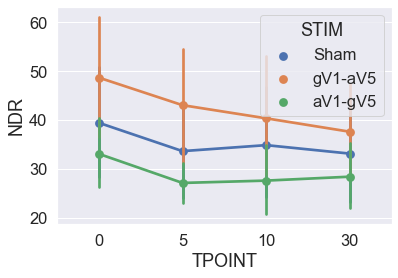

In [13]:
### Multi-way ANOVA

import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels
import pingouin as pg

NDR = pd.read_excel('Raw_NDR.xlsx', 'Sheet2')
# print(NDR)

NDR_G3_Bsl = NDR['C_Bsl']
NDR_G3_Bsl = NDR_G3_Bsl.drop(index=4, inplace=False)
NDR_G4_Bsl = NDR['D_Bsl']
# NDR_G4_Bsl = NDR_G4_Bsl.drop(index=2, inplace=False)
NDR_G5_Bsl = NDR['E_Bsl']

NDR_G3_ACS = NDR['C_tACS']
NDR_G3_ACS = NDR_G3_ACS.drop(index=4, inplace=False)
NDR_G4_ACS = NDR['D_tACS']
# NDR_G4_ACS = NDR_G4_ACS.drop(index=2, inplace=False)
NDR_G5_ACS = NDR['E_tACS']

NDR_G3_P10 = NDR['C_P10']
NDR_G3_P10 = NDR_G3_P10.drop(index=4, inplace=False)
NDR_G4_P10 = NDR['D_P10']
# NDR_G4_P10 = NDR_G4_P10.drop(index=2, inplace=False)
NDR_G5_P10 = NDR['E_P10']

NDR_G3_P30 = NDR['C_P30']
NDR_G3_P30 = NDR_G3_P30.drop(index=4, inplace=False)
NDR_G4_P30 = NDR['D_P30']
# NDR_G4_P30 = NDR_G4_P30.drop(index=2, inplace=False)
NDR_G5_P30 = NDR['E_P30']


# ndr_basic = pd.concat([NDR_G5_Bsl/NDR_G5_Bsl, NDR_G4_Bsl/NDR_G4_Bsl, NDR_G3_Bsl/NDR_G3_Bsl,
#                      NDR_G5_ACS/NDR_G5_Bsl, NDR_G4_ACS/NDR_G4_Bsl, NDR_G3_ACS/NDR_G3_Bsl,
#                      NDR_G5_P10/NDR_G5_Bsl, NDR_G4_P10/NDR_G4_Bsl, NDR_G3_P10/NDR_G3_Bsl,
#                      NDR_G5_P30/NDR_G5_Bsl, NDR_G4_P30/NDR_G4_Bsl, NDR_G3_P30/NDR_G3_Bsl], axis=0)

ndr_basic = pd.concat([NDR_G5_Bsl, NDR_G4_Bsl, NDR_G3_Bsl,
                     NDR_G5_ACS, NDR_G4_ACS, NDR_G3_ACS,
                     NDR_G5_P10, NDR_G4_P10, NDR_G3_P10,
                     NDR_G5_P30, NDR_G4_P30, NDR_G3_P30], axis=0)
# print(ndr_basic)
ndr_basic = ndr_basic.reset_index(drop=True)

o = [number+1 for number in range(14)] #G3
a = [number+15 for number in range(15)] #G4
s = [number+30 for number in range(15)] #G5
subs = s+a+o+s+a+o+s+a+o+s+a+o
subj = pd.DataFrame(subs, columns=['ID']) 
subj = subj.reset_index(drop=True)

AG = ['aV1-gV5' for number in range(14)] #G3
GA = ['gV1-aV5' for number in range(15)] #G4
Sham = ['Sham' for number in range(15)] #G5
# IPh = ['InPhase' for number in range(14)] #G1
# APh = ['AntiPhase' for number in range(13)] #G2
# Sham = ['Sham' for number in range(15)] #G5
grouped = Sham+GA+AG+Sham+GA+AG+Sham+GA+AG+Sham+GA+AG
grou = pd.DataFrame(grouped, columns=['STIM']) 
grou = grou.reset_index(drop=True)
# print(grou)

Bs = [0 for number in range(44)] #'Bsl'
AC = [5 for number in range(44)] #'P10'
P1 = [10 for number in range(44)] #'P10'
P3 = [30 for number in range(44)] #'P30'
timepo = Bs+AC+P1+P3
tim = pd.DataFrame(timepo, columns=['TPOINT'])
tim = tim.reset_index(drop=True)
# print(tim)

behav = pd.concat([ndr_basic, grou, tim, subj], axis=1)
behav.rename(columns={0:'NDR'}, inplace=True)
# print(behav)
behav.to_csv('II_NDR_ANOVA.txt', sep='\t')

aov = pg.mixed_anova(dv='NDR', within='TPOINT', between='STIM', subject='ID', data=behav, correction=True)
print(aov.round(2))

import seaborn as sns
ax = sns.pointplot(x="TPOINT", y="NDR", hue="STIM", data=behav)

post = behav.pairwise_ttests(dv='NDR', within=['TPOINT'], between=['STIM'], subject='ID', interaction=1, padjust='bonf')
print(post)


In [16]:
# Best Feature Selection
import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing, utils

### Read Massive DataFrame
pd.set_option('display.max_rows', 200)
df = pd.read_csv('II_Mixed_mod_All.txt', sep=r'\s', header=0, 
                 names = ['NDR','SUBJECT','GROUP','TIMEP','PSDA','PSDB','PSDG',
                          'COHA','COHB','COHG','V1pV5a','V1aV5p','WPLIA','WPLIB','WPLIG',
                          'PSIT','PSIA','PSIB','PSIG', 'IMCOHA','IMCOHB','IMCOHG'])
print(len(df))

### Dropping groups in order to find the most accurate feature
# df.drop(df[df['GROUP']=='Sham'].index, inplace=True)
# df.drop(df[df['GROUP']=='gV1-aV5'].index, inplace=True)
# print(len(df))

### Define Target variable
y = df['NDR'].loc[88:] 
X = df.drop(['NDR', 'SUBJECT', 'GROUP', 'TIMEP'],1).loc[88:,:]
# print(len(y),len(X))

### Discard outliers based on ZScores
outl = X[~(np.abs(stats.zscore(X)) < 3).all(axis=1)]
X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
y = y.drop(outl.index)
# print(len(y),len(X))

### Save Preprocessed output for Statistics
df = df.drop(outl.index)
II_Mixed_mod_Prepro = df.reset_index(drop=True)
# print(II_Mixed_mod_Prepro)
II_Mixed_mod_Prepro.to_csv('II_Mixed_mod_Prepro.txt', sep='\t')
print(len(df))

# print(y,X)
num_feats = 6

### Pre Processing
X_norm = MinMaxScaler().fit_transform(X.values) #Normalization
lab_enc = preprocessing.LabelEncoder()
y_norm = lab_enc.fit_transform(y)

### Correlation with y for each feature in X by putting all of them in a list
cor_list = []
feature_name = X.columns.tolist()
for i in X.columns.tolist():
    cor = np.corrcoef(X[i], y)[0, 1]
    cor_list.append(cor)
#     print(cor)
cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
cor_support = [True if i in cor_feature else False for i in feature_name]
print('Pearson:',cor_feature)

### Best F Value selection
f_selector = SelectKBest(f_classif, k=num_feats)
f_selector.fit(X_norm, y_norm)
f_support = f_selector.get_support()
f_feature = X.loc[:,f_support].columns.tolist()
print('F:', f_feature)

### Best Chi Squared Value selection: The more independent a feature is the more uninformative 
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y_norm)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print('Chi-2:', chi_feature)

### Wrapper Method: Recursive Feature Elimination -> Backwards Regression
br_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=100, verbose=5)
br_selector.fit(X_norm, y_norm)
br_support = br_selector.get_support()
br_feature = X.loc[:,br_support].columns.tolist()
print('Backwards:', br_feature)

### Wrapper Method: Recursive Feature Elimination -> Smaller & smaller set based on features Coeff.
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=100, verbose=5)
rfe_selector.fit(X_norm, y_norm)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print('RFE:', rfe_feature)

### Embedded Method: Logistic Regression (l1 penalty) -> Force features' weights to be zero
embeded_las_selector = SelectFromModel(Lasso(), max_features=num_feats)
embeded_las_selector.fit(X_norm, y_norm)
embeded_las_support = embeded_las_selector.get_support()
embeded_las_feature = X.loc[:,embeded_las_support].columns.tolist()
print('Lasso:', embeded_las_feature)

### Embedded Method: Logistic Regression (l1 penalty) -> Force features' weights to be zero
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y_norm)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print('Logistics:', embeded_lr_feature)

### Embedded Method: Support Vector Classifier (l1 penalty) 
embeded_svc_selector = SelectFromModel(LinearSVC(penalty='l1', dual=False), max_features=num_feats)
embeded_svc_selector.fit(X_norm, y_norm)
embeded_svc_support = embeded_svc_selector.get_support()
embeded_svc_feature = X.loc[:,embeded_svc_support].columns.tolist()
print('Support Vector:', embeded_svc_feature)

### Embedded Method: Tree-Based -> Impurity-based feature importances
embeded_r_selector = SelectFromModel(ExtraTreesClassifier(n_estimators=100), max_features=num_feats)
embeded_r_selector.fit(X_norm, y_norm)
embeded_r_support = embeded_r_selector.get_support()
embeded_r_feature = X.loc[:,embeded_r_support].columns.tolist()
print('Extra Trees:', embeded_r_feature)

### Embedded Method: Tree-Based -> Node impurities in e/decision tree. Result = Avg. Decision Tree importance
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_norm, y_norm)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print('Random Forest:', embeded_rf_feature)

### Embedded Method: Light Gradient Boosting Machine -> Grows trees leaf-wise
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X_norm, y_norm)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print('LightGBM:', embeded_lgb_feature)

### Score all methods together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'F':f_support, 'Chi-2':chi_support, 'Backwards': br_support, 'RFE':rfe_support,
                                     'Lasso':embeded_las_support, 'Logistics':embeded_lr_support,
                                     'Support Vector':embeded_svc_support,'Extra Trees':embeded_r_support, 'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


176
155
Pearson: ['PSIT', 'PSIA', 'PSDG', 'V1aV5p', 'WPLIA', 'PSDB']
F: ['PSIA', 'PSIB', 'PSIG', 'IMCOHA', 'IMCOHB', 'IMCOHG']
Chi-2: ['COHA', 'COHB', 'COHG', 'V1pV5a', 'WPLIB', 'WPLIG']
Fitting estimator with 18 features.
Backwards: ['PSDA', 'PSDB', 'COHA', 'COHB', 'V1aV5p', 'WPLIA']
Fitting estimator with 18 features.
RFE: ['PSDA', 'COHA', 'COHG', 'WPLIA', 'WPLIB', 'WPLIG']
Lasso: ['WPLIA']
Logistics: ['WPLIB', 'PSIB', 'PSIG', 'IMCOHB']
Support Vector: ['V1aV5p', 'WPLIB', 'PSIB', 'PSIG', 'IMCOHA', 'IMCOHG']
Extra Trees: ['PSDB', 'PSDG', 'COHB', 'WPLIG', 'PSIA', 'PSIB']
Random Forest: ['PSDA', 'PSDB', 'V1pV5a', 'WPLIA', 'WPLIB', 'IMCOHB']
LightGBM: ['PSDA', 'PSDB', 'PSDG', 'COHA', 'COHB', 'COHG']


,Feature,Pearson,F,Chi-2,Backwards,RFE,Lasso,Logistics,Support Vector,Extra Trees,Random Forest,LightGBM,Total
1,WPLIB,False,False,True,False,True,False,True,True,False,True,False,5
2,WPLIA,True,False,False,True,True,True,False,False,False,True,False,5
3,PSDB,True,False,False,True,False,False,False,False,True,True,True,5
4,PSIB,False,True,False,False,False,False,True,True,True,False,False,4
5,PSDA,False,False,False,True,True,False,False,False,False,True,True,4
6,COHB,False,False,True,True,False,False,False,False,True,False,True,4


/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


        Source     SS  DF1  DF2    MS     F  p-unc  p-GG-corr   np2   eps  \
0        GROUP   0.74    2   41  0.37  0.13   0.88        NaN  0.01   NaN   
1        TIMEP   0.49    2   82  0.24  0.20   0.82       0.82  0.00  0.96   
2  Interaction  10.34    4   82  2.58  2.12   0.09        NaN  0.09   NaN   

  sphericity  W-spher  p-spher  
0        NaN      NaN      NaN  
1       True     0.96     0.42  
2        NaN      NaN      NaN  
         Contrast TIMEP        A        B Paired  Parametric         T  \
0           TIMEP     -      Bsl     TP10   True        True -0.618139   
1           TIMEP     -      Bsl     TP30   True        True -0.477399   
2           TIMEP     -     TP10     TP30   True        True  0.043285   
3           GROUP     -  aV1-gV5  gV1-aV5  False        True  0.110956   
4           GROUP     -  aV1-gV5     Sham  False        True  0.472403   
5           GROUP     -  gV1-aV5     Sham  False        True  0.404410   
6   TIMEP * GROUP   Bsl  aV1-gV5  gV1-aV5

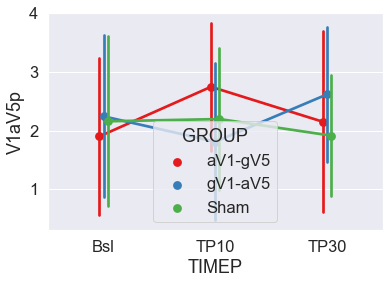

In [4]:
import seaborn as sns
import pandas as pd
import pingouin as pg

df1 = pd.read_csv('II_Mixed_mod_All_Raw.txt', sep=r'\s', header=0, 
                 names = ['NDR','SUBJECT','GROUP','TIMEP','PSDA','PSDB','PSDG',
                          'COHA','COHB','COHG','V1pV5a','V1aV5p','WPLIA','WPLIB','WPLIG',
                          'PSIT','PSIA','PSIB','PSIG','IMCOHA','IMCOHB','IMCOHG'])
df1.drop(df1.index[44:88,], inplace=True)
sns.set(font_scale=1.5)  # crazy big
ax = sns.pointplot(x="TIMEP", y="V1aV5p", hue="GROUP", data=df1, dodge=True, kind="point", ci="sd", palette="Set1")

aov = pg.mixed_anova(dv='V1aV5p', within='TIMEP', between='GROUP', subject='SUBJECT', data=df1, correction=True)
print(aov.round(2))
post = df1.pairwise_ttests(dv='V1aV5p', within=['TIMEP'], between=['GROUP'], subject='SUBJECT', interaction=1, padjust='bonf')
print(post)

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


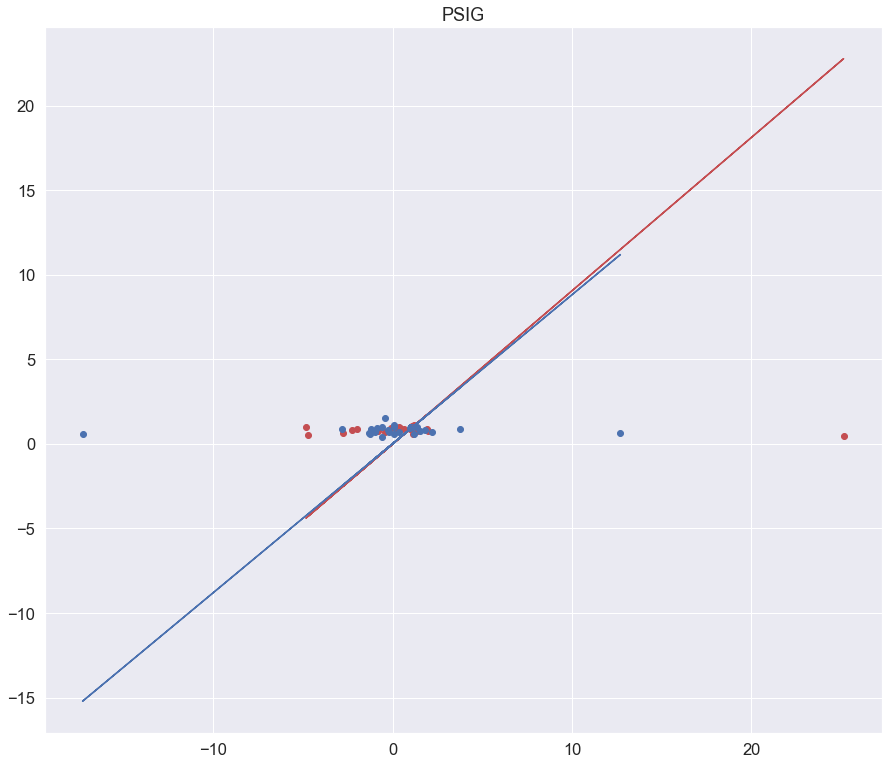

In [17]:
import pandas as pd
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

pd.set_option('display.max_rows', 200)
df2 = pd.read_csv('II_Mixed_mod_Prepro.txt', sep=r'\s', header=0, 
                 names = ['NDR','SUBJECT','GROUP','TIMEP','PSDA','PSDB','PSDG',
                          'COHA','COHB','COHG','V1pV5a','V1aV5p','WPLIA','WPLIB','WPLIG',
                          'PSIT','PSIA','PSIB','PSIG'])

# Drop all values corresponding to Sham
# df2.drop(df2[df2['GROUP']=='Sham'].index, inplace=True)
df2.dropna(inplace=True)
df2.reset_index(drop=True)
# print(df2)

### Define Target variables
G = df2.groupby('GROUP')

# Scatter plot for every feature

fig1 = plt.figure(figsize=(15.0, 13.0)) # Horizontal fig (3,1,x)
colors = ('r','b','g')

for co, gr in enumerate(G):
#     print(gr)
#     fig1.add_subplot(5,1,1)
#     plt.scatter(gr[1].iloc[:,4], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,5], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,6], gr[1]['NDR'], c=colors[c])
#     plt.title('PSD')
    
#     fig1.add_subplot(5,1,2)
#     plt.scatter(gr[1].iloc[:,7], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,8], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,9], gr[1]['NDR'], c=colors[c])
#     plt.title('COH')
    
#     fig1.add_subplot(5,1,3)
#     plt.scatter(gr[1].iloc[:,10], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,11], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,11], gr[1]['NDR'], c=colors[c])
#     plt.title('ZPAC')
    
#     fig1.add_subplot(1,5,4)
#     plt.scatter(gr[1].iloc[:,12], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,13], gr[1]['NDR'], c=colors[c])
    plt.scatter(gr[1].iloc[:,18], gr[1]['NDR'], c=colors[co])
    plt.title('PSIG')
    
    z = np.polynomial.polynomial.polyfit(gr[1].iloc[:,18], gr[1]['NDR'], 1)
    p = np.poly1d(z)
    plt.plot(gr[1].iloc[:,18],p(gr[1].iloc[:,18]),colors[co])
    
#     fig1.add_subplot(5,1,1)
#     plt.scatter(gr[1].iloc[:,4], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,5], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,6], gr[1]['NDR'], c=colors[c])
#     plt.title('PSD')


#     model = AffinityPropagation(damping=0.9)
#     model.fit(gr[1].iloc[:,4+f], gr[1]['NDR'])

#     # assign a cluster to each example
#     yhat = model.predict(gr[1].iloc[:,4+f])
#     # retrieve unique clusters
#     clusters = unique(yhat)
#     for cluster in clusters:
#         # get row indexes for samples with this cluster
#         row_ix = where(yhat == cluster)
#         # create scatter of these samples
#         plt.scatter(gr[1].iloc[row_ix,4+f], gr[1]['NDR'][row_ix, 1])

plt.show()


# plt.scatter(X1_norm[])